In [1]:
# data
# modeling
# error measurement
# training and optimization
# perfomance measurement
# validation and testing
# corrective measures

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
print(len(tf.config.list_physical_devices('GPU'))>0)

True


In [4]:
print("GPU's Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

GPU's Available:  1


In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
print(sns.__version__)

0.13.0


In [7]:
data = pd.read_csv('train.csv')

In [8]:
data.shape

(1000, 12)

In [9]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [10]:
# sns.pairplot(data)

In [11]:
tensor_data = tf.constant(data)

In [12]:
print(tensor_data.shape)

(1000, 12)


In [13]:
tensor_data = tf.cast(tensor_data,tf.float64)

In [14]:
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [15]:
tensor_data = tf.random.shuffle(tensor_data)

In [16]:
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float64, numpy=
array([[8.670000e+02, 6.322920e+05, 7.948660e+05, ..., 6.600000e+01,
        1.200000e+02, 2.392140e+05],
       [6.800000e+01, 5.918340e+05, 7.657510e+05, ..., 8.100000e+01,
        9.500000e+01, 3.004995e+05],
       [5.970000e+02, 5.850690e+05, 8.726440e+05, ..., 7.000000e+01,
        1.370000e+02, 3.055890e+05],
       ...,
       [7.500000e+01, 5.720940e+05, 7.145210e+05, ..., 1.050000e+02,
        9.000000e+01, 1.248475e+05],
       [3.200000e+02, 5.203070e+05, 8.584440e+05, ..., 6.200000e+01,
        1.350000e+02, 1.840925e+05],
       [2.520000e+02, 5.687020e+05, 8.498650e+05, ..., 9.900000e+01,
        1.160000e+02, 2.084680e+05]])>

In [17]:
x = tensor_data[:,3:-1]
y = tensor_data[:,-1]

In [18]:
x.shape

TensorShape([1000, 8])

In [19]:
y.shape

TensorShape([1000])

In [20]:
x[:5]

<tf.Tensor: shape=(5, 8), dtype=float64, numpy=
array([[7.00000e+00, 1.18659e+05, 2.00000e+00, 7.00000e+00, 1.20000e+01,
        1.80000e+02, 6.60000e+01, 1.20000e+02],
       [5.00000e+00, 9.43650e+04, 1.00000e+00, 4.00000e+00, 8.00000e+00,
        1.94000e+02, 8.10000e+01, 9.50000e+01],
       [6.00000e+00, 1.04912e+05, 2.00000e+00, 1.00000e+00, 1.10000e+01,
        1.76000e+02, 7.00000e+01, 1.37000e+02],
       [7.00000e+00, 7.72700e+04, 2.00000e+00, 4.00000e+00, 1.20000e+01,
        1.45000e+02, 7.70000e+01, 1.31000e+02],
       [3.00000e+00, 7.63630e+04, 4.00000e+00, 8.00000e+00, 8.00000e+00,
        1.52000e+02, 1.15000e+02, 8.40000e+01]])>

In [21]:
y[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([239214. , 300499.5, 305589. , 315959. , 503606.5])>

In [22]:
y1 = tf.expand_dims(y,axis = -1) # making y to 2 dimensional # here you can also use axis = 1
# axis = -1 means the last dimension of the data 

In [23]:
y1[:5]

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[239214. ],
       [300499.5],
       [305589. ],
       [315959. ],
       [503606.5]])>

In [24]:
# Normalization -> feature scaling
# This normalization basically is feature scaling that standardize the data
# (x-mean)/s.d to each point to attain the maximum values between -1 and 1

In [25]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)

In [26]:
x_train = x[:int(dataset_size*train_ratio)]
y_train = y[:int(dataset_size*train_ratio)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800,)


### tensorflow data api

The tf.data.Dataset API supports writing descriptive and efficient input pipelines.We can use tensorflow data api to load data into model even more faster and efficiently. This api is used when you have huge data. Rather than preprocessing and appling transformation on whole dataset. This api create batches allowing you to apply data preprocessing on succeeding batches while you train your model on prior batches. Thus making your model time efficient. For Example, here you used normalizer to do data preprocessing (i.e. here scaling the data to standardization). So if you had dataset containing millions or billions of examples so to attain computational efficiency you could use this api as a pipeline which would send a single batch for training while preprocessing the next batch. Thus succeedingly doing that till all the batches would have trained. If you didn't used this api then your model would have normalized all the data before training thus taking all the time required for preprocessing and training.

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
# prefetch allows later elements to be prepared while the current element is being processed. 
# this mean while model is training on prior batch next batch will preprocess meanwhile

In [28]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [29]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [30]:
for a,b in train_dataset:
    print(a.shape)
    print(b.shape)
    break

(32, 8)
(32,)


In [31]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [32]:
x_val = x[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]
y_val = y[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100,)


In [33]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [34]:
x_test = x[int(dataset_size*(train_ratio+validation_ratio)):]
y_test = y[int(dataset_size*(train_ratio+validation_ratio)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100,)


In [35]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [36]:
# normalization

In [37]:
normalizer = Normalization()
normalizer.adapt(x_train) # calculate mean and std for each column and do the standardization processing automatically
normalized_x = normalizer(x)

In [38]:
# model building

In [39]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(200,activation = 'relu'),
    Dense(164,activation = 'relu'),
    Dense(100,activation = 'relu'),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 200)               1800      
                                                                 
 dense_1 (Dense)             (None, 164)               32964     
                                                                 
 dense_2 (Dense)             (None, 100)               16500     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 51,382
Trainable params: 51,365
Non-trainable params: 17
___________________________________________________

In [40]:
model.compile(optimizer = Adam(learning_rate = 0.1),loss = MeanAbsoluteError(),metrics = RootMeanSquaredError())

In [41]:
history = model.fit(train_dataset,validation_data = val_dataset ,epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 3s 21ms/step - loss: 145734.5625 - root_mean_squared_error: 196289.0625 - val_loss: 52847.9688 - val_root_mean_squared_error: 65675.3828
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 60706.6953 - root_mean_squared_error: 75347.8594 - val_loss: 53102.2383 - val_root_mean_squared_error: 66116.8125
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 50160.0781 - root_mean_squared_error: 62525.0078 - val_loss: 47597.0469 - val_root_mean_squared_error: 58370.9297
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 49068.7266 - root_mean_squared_error: 61161.2812 - val_loss: 47179.2031 - val_root_mean_squared_error: 58300.2422
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 44056.1953 - root_mean_squared_error: 54813.2422 - val_loss: 40941.6406 - val_root_mean_squared_error: 51004.4609
Epoch 6/100
25/25 [==============================] - 0s 7ms/st

25/25 [==============================] - 0s 7ms/step - loss: 38202.1055 - root_mean_squared_error: 48035.7109 - val_loss: 37171.1680 - val_root_mean_squared_error: 46886.6797
Epoch 43/100
25/25 [==============================] - 0s 7ms/step - loss: 40032.6094 - root_mean_squared_error: 50045.8633 - val_loss: 40278.1758 - val_root_mean_squared_error: 50370.2969
Epoch 44/100
25/25 [==============================] - 0s 7ms/step - loss: 52714.8984 - root_mean_squared_error: 65674.4375 - val_loss: 56925.7383 - val_root_mean_squared_error: 69086.8984
Epoch 45/100
25/25 [==============================] - 0s 8ms/step - loss: 37516.6914 - root_mean_squared_error: 47657.9922 - val_loss: 33654.1953 - val_root_mean_squared_error: 42253.4297
Epoch 46/100
25/25 [==============================] - 0s 7ms/step - loss: 35566.0820 - root_mean_squared_error: 44456.6914 - val_loss: 37226.6992 - val_root_mean_squared_error: 46679.9023
Epoch 47/100
25/25 [==============================] - 0s 7ms/step - loss:

Epoch 86/100
25/25 [==============================] - 0s 6ms/step - loss: 32767.7773 - root_mean_squared_error: 41864.5000 - val_loss: 33185.9531 - val_root_mean_squared_error: 42725.4531
Epoch 87/100
25/25 [==============================] - 0s 7ms/step - loss: 33282.6875 - root_mean_squared_error: 42738.4102 - val_loss: 32322.6797 - val_root_mean_squared_error: 41253.5469
Epoch 88/100
25/25 [==============================] - 0s 6ms/step - loss: 30348.6445 - root_mean_squared_error: 39674.9336 - val_loss: 29875.6602 - val_root_mean_squared_error: 38539.3125
Epoch 89/100
25/25 [==============================] - 0s 8ms/step - loss: 30390.4258 - root_mean_squared_error: 39799.6211 - val_loss: 37613.3047 - val_root_mean_squared_error: 47733.3516
Epoch 90/100
25/25 [==============================] - 0s 7ms/step - loss: 31102.5371 - root_mean_squared_error: 40604.9180 - val_loss: 30365.3281 - val_root_mean_squared_error: 38872.1523
Epoch 91/100
25/25 [==============================] - 0s 7ms

In [42]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

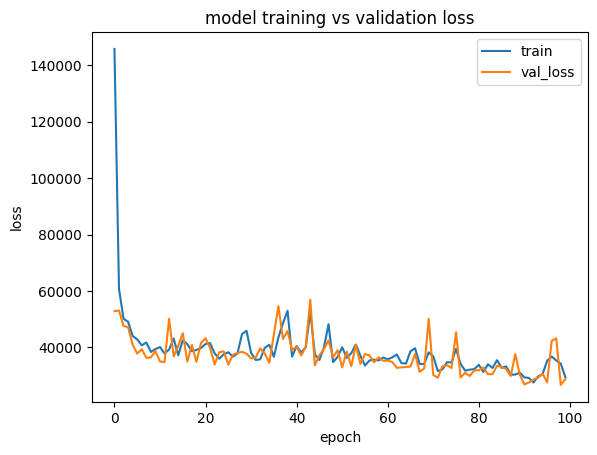

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

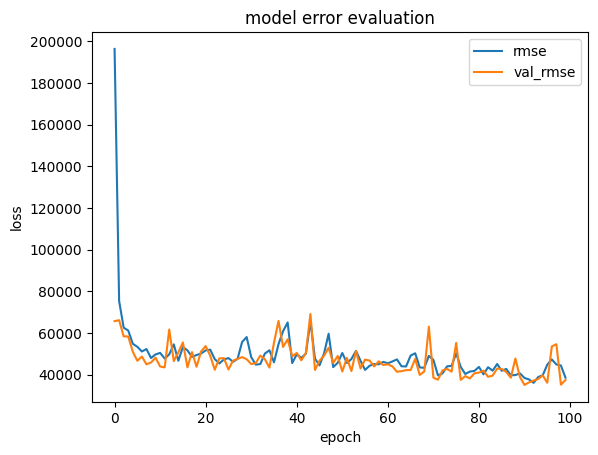

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error evaluation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['rmse','val_rmse'])
plt.show()

In [45]:
# normally validation loss is always greater than training loss

In [46]:
model.evaluate(test_dataset)

1/1 [==============================] - 0s 60ms/step - loss: 28771.2266 - root_mean_squared_error: 37441.5039


[28771.2265625, 37441.50390625]

In [47]:
x_test.shape

TensorShape([100, 8])

In [48]:
x_test[0].shape

TensorShape([8])

In [49]:
tf.expand_dims(x_test[0],axis = 0).shape

TensorShape([1, 8])

In [50]:
model.predict(tf.expand_dims(x_test[0],axis = 0))

1/1 [==============================] - 0s 156ms/step


array([[151116.23]], dtype=float32)

In [51]:
y_true = list(y_test.numpy())

In [52]:
y_predict = list(model.predict(x_test)[:,0])

4/4 [==============================] - 0s 4ms/step


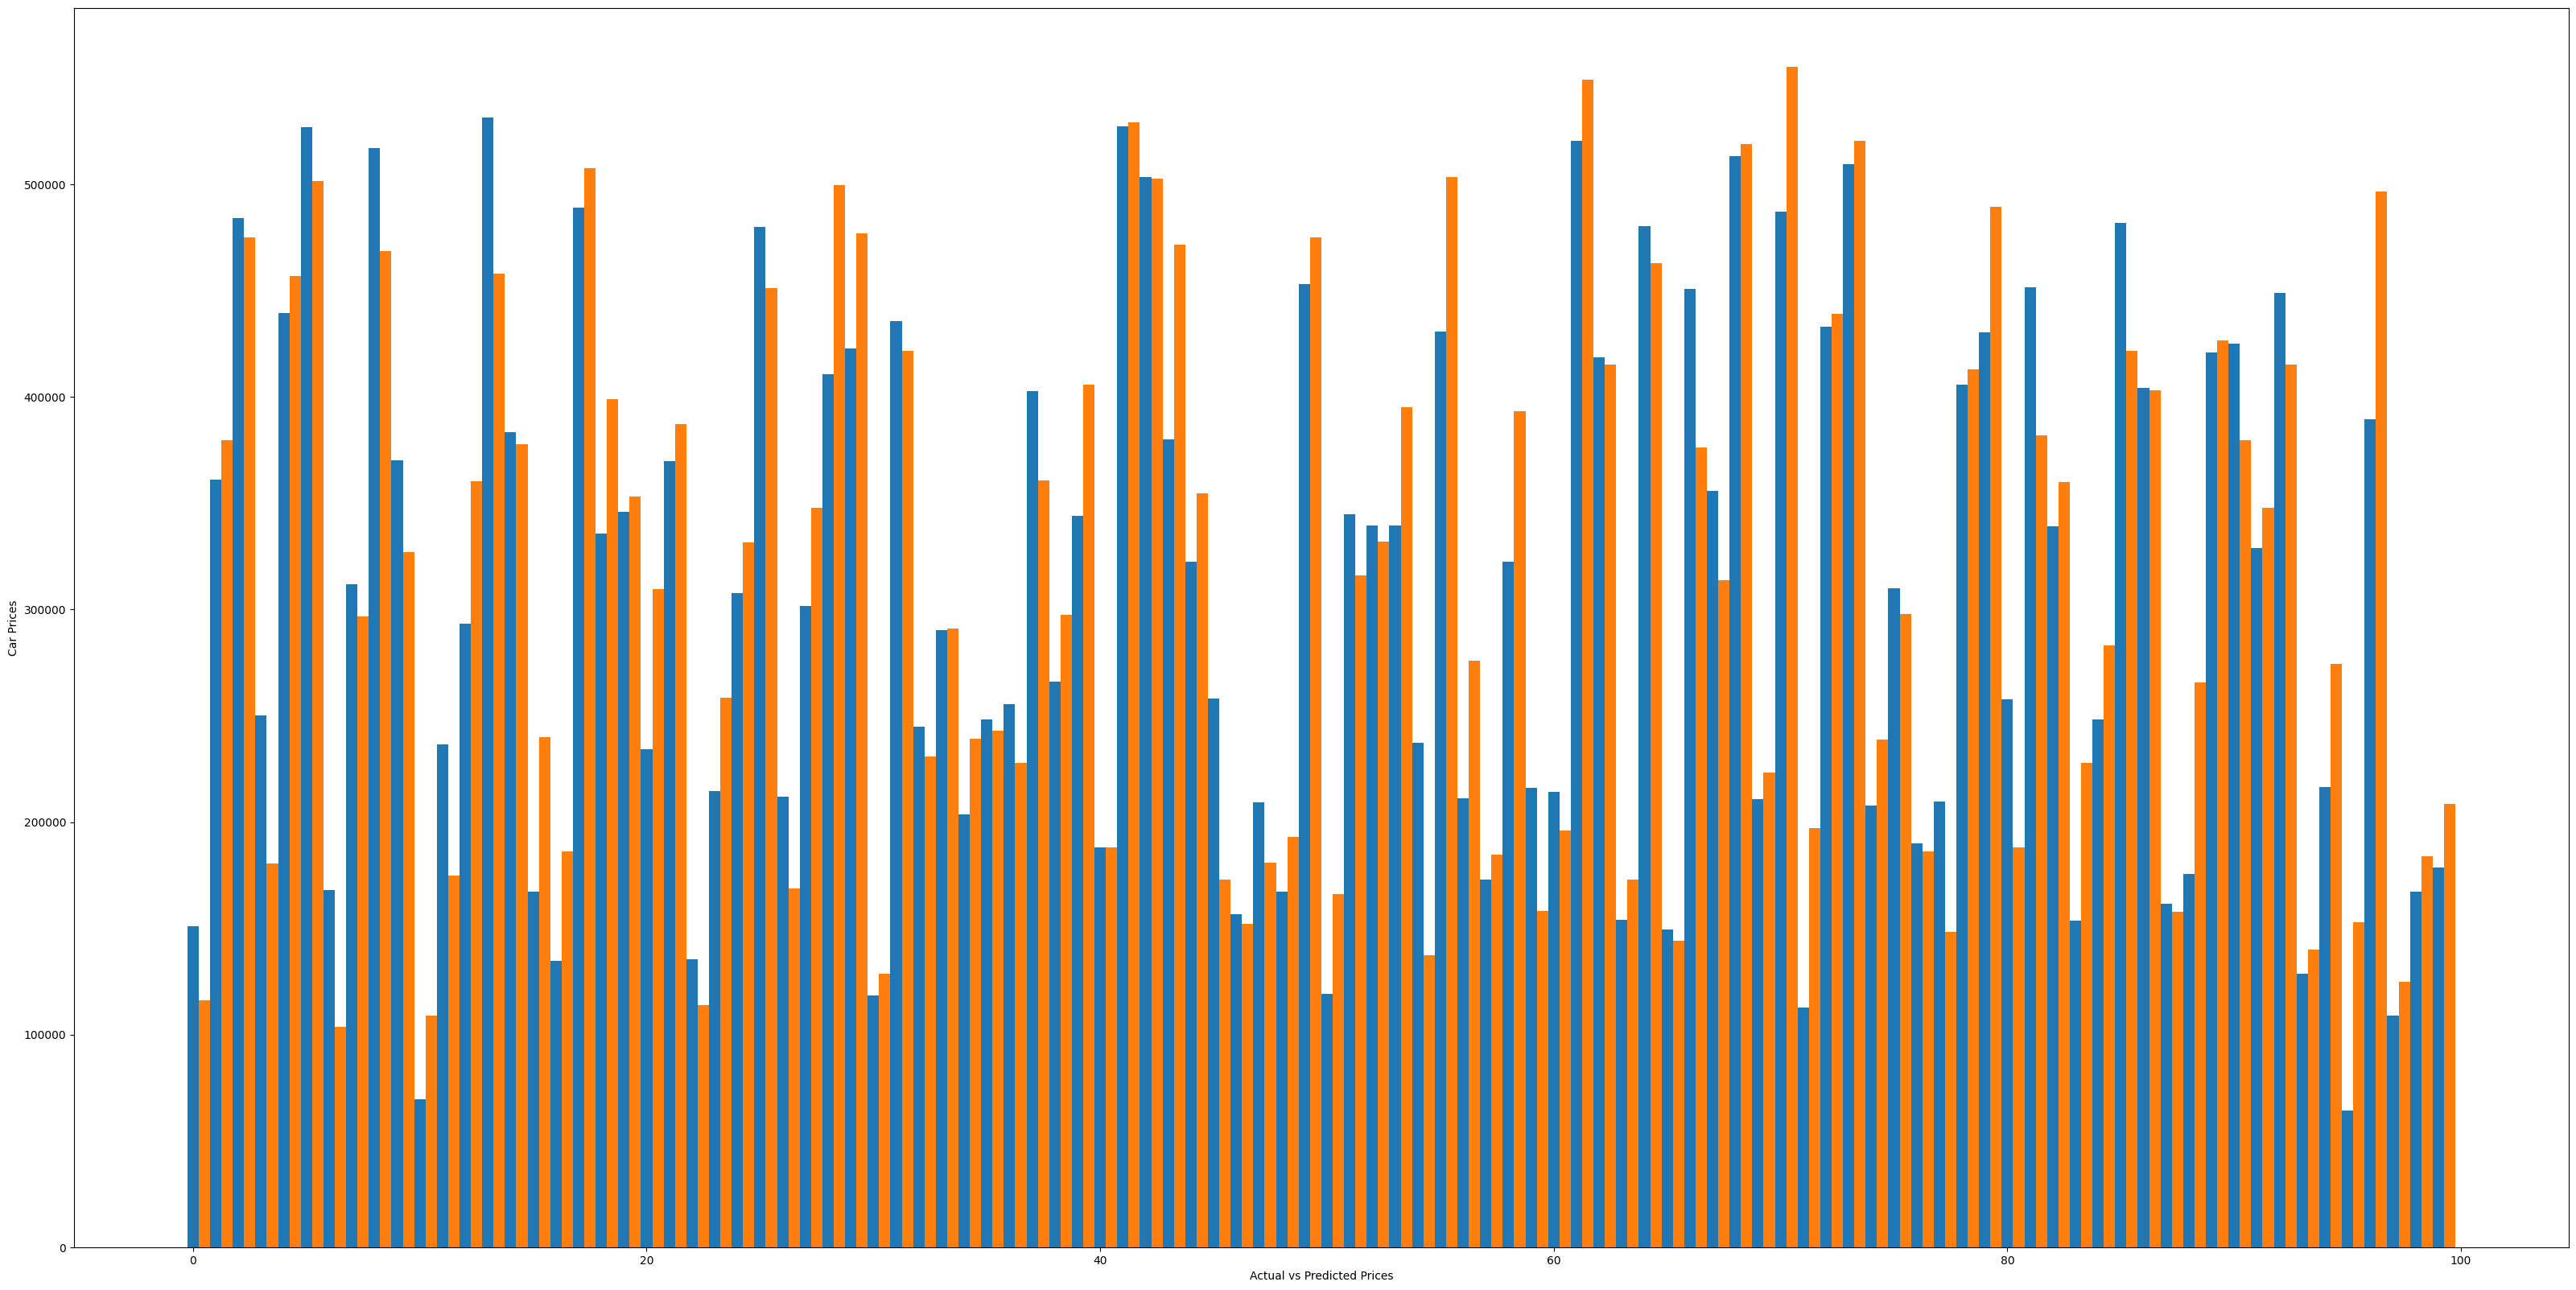

In [53]:
ind = np.arange(100)
plt.figure(figsize = (40,20))

width = 0.5

plt.bar(ind,y_predict,width,label = 'Predicted Car Price')
plt.bar(ind+width,y_true,width,label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()